In [1]:
import torch
from matplotlib import pyplot as plt
import  numpy as np
import cv2

**2.Load Model**

In [2]:
model= torch.hub.load('ultralytics/yolov5','yolov5s')


C:\Users\Yuvraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\hub.py:295: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Yuvraj/.cache\torch\hub\master.zip


Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\Yuvraj\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
requirements: Ultralytics requirement ['gitpython>=3.1.30'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

requirements: AutoUpdate success  13.5s, installed 1 package: ['gitpython>=3.1.30']
requirements:  Restart runtime or rerun command for updates to take effect



YOLOv5  2025-1-20 Python-3.12.4 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)

100%|█████████████████████████████████████████████████████████████████████████████| 14.1M/14.1M [00:02<00:00, 7.33MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [5]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

**3.Make Detections**

In [6]:
img='https://c8.alamy.com/comp/P6YB2N/los-angeles-usa-june-29-unidentified-random-people-in-the-streets-of-downtown-of-los-angeles-ca-on-june-29-2018-P6YB2N.jpg'

In [7]:
results=model(img)
results.print()

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 957x1300 4 persons, 1 bicycle, 6 cars, 1 parking meter, 1 backpack
Speed: 329.8ms pre-process, 791.8ms inference, 56.9ms NMS per image at shape (1, 3, 480, 640)


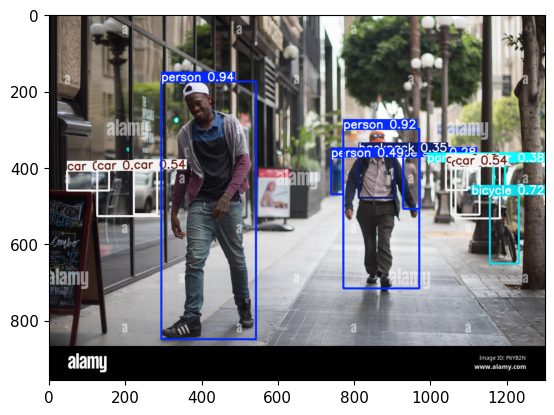

In [8]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [9]:
results.xyxy

[tensor([[2.94217e+02, 1.76961e+02, 5.42526e+02, 8.50627e+02, 9.44304e-01, 0.00000e+00],
         [7.71294e+02, 3.00500e+02, 9.70296e+02, 7.17915e+02, 9.21090e-01, 0.00000e+00],
         [1.15548e+03, 4.72994e+02, 1.23153e+03, 6.52395e+02, 7.22445e-01, 1.00000e+00],
         [2.22403e+02, 4.05281e+02, 2.83012e+02, 5.23740e+02, 5.44068e-01, 2.00000e+00],
         [1.06579e+03, 3.94705e+02, 1.18193e+03, 5.34436e+02, 5.39533e-01, 2.00000e+00],
         [7.39838e+02, 3.74123e+02, 7.70491e+02, 4.71716e+02, 4.90534e-01, 0.00000e+00],
         [1.05421e+03, 3.99864e+02, 1.12857e+03, 5.24160e+02, 4.43801e-01, 2.00000e+00],
         [1.04013e+03, 3.90623e+02, 1.09612e+03, 4.60641e+02, 4.16642e-01, 2.00000e+00],
         [1.16627e+03, 3.87945e+02, 1.19539e+03, 4.74989e+02, 3.79765e-01, 1.20000e+01],
         [8.11592e+02, 3.61464e+02, 9.05024e+02, 4.80146e+02, 3.50744e-01, 2.40000e+01],
         [1.26739e+02, 4.07199e+02, 2.94935e+02, 5.28067e+02, 3.13183e-01, 2.00000e+00],
         [4.76250e+01

**4.Real time Deatections**

In [9]:
cap=cv2.VideoCapture(0)
while cap.isOpened():
    ret,frame=cap.read()

    #Make detections
    results=model(frame)
    cv2.imshow('YOLO',np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

C:\Users\Yuvraj/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Yuvraj/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Yuvraj/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Yuvraj/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Yuvraj/.cache\torch\hub\ultralytics_yolov5_master\m

In [8]:
#Connnecting to webcamera
cap=cv2.VideoCapture(0)
#Loop through every frame until we close our web cam
while cap.isOpened():
    ret, frame = cap.read()
    #Make detections
    results=model(frame)
    #show image
    cv2.imshow('Webcam', frame)
    #Checks whether q has been hit and stops the loop
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break

#Releases the Webcam
cap.release()
#Closes the frame
cv2.destroyAllWindows()

C:\Users\Yuvraj/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Yuvraj/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Yuvraj/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Yuvraj/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Yuvraj/.cache\torch\hub\ultralytics_yolov5_master\m

**5.Train from Scratch**

In [10]:
import uuid #unique identifier
import os
import time

In [13]:
IMAGE_PATH = os.path.join('data','image')#data/images
labels=['awake','drowsy']
number_imgs=20

In [14]:
cap=cv2.VideoCapture(0)
#Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)

    #loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {},image number {}'.format(label,img_num))
        ret, frame=cap.read()

        # Check if the frame is valid
        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            break
        #Naming out image path
        imgname=os.path.join(IMAGE_PATH,label+'.'+str(uuid.uuid1())+'.jpg')

        #Writes out image to file
        cv2.imwrite(imgname,frame)

        #render to the screen
        cv2.imshow('Image Collection',frame)

        #2 seconds delay between captures
        time.sleep(2)

        if cv2.waitKey(10) & 0xFF==ord('q'):
            break
cap.release()
cv2.destroyAllWindows()


Can't receive frame (stream end?). Exiting ...
Can't receive frame (stream end?). Exiting ...


In [15]:
labels[0]

'awake'

In [16]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {},image number {}'.format(label,img_num))
        imgname=os.path.join(IMAGE_PATH,label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)


data/image/awake.26171164-d68a-11ef-a558-0242ac1c000c.jpg
data/image/awake.2617159c-d68a-11ef-a558-0242ac1c000c.jpg
data/image/awake.261717e0-d68a-11ef-a558-0242ac1c000c.jpg
data/image/awake.261719de-d68a-11ef-a558-0242ac1c000c.jpg
data/image/awake.26171d08-d68a-11ef-a558-0242ac1c000c.jpg
data/image/awake.26171f60-d68a-11ef-a558-0242ac1c000c.jpg
data/image/awake.26172154-d68a-11ef-a558-0242ac1c000c.jpg
data/image/awake.26172370-d68a-11ef-a558-0242ac1c000c.jpg
data/image/awake.26172564-d68a-11ef-a558-0242ac1c000c.jpg
data/image/awake.26172744-d68a-11ef-a558-0242ac1c000c.jpg
data/image/awake.26172942-d68a-11ef-a558-0242ac1c000c.jpg
data/image/awake.26172bae-d68a-11ef-a558-0242ac1c000c.jpg
data/image/awake.26172de8-d68a-11ef-a558-0242ac1c000c.jpg
data/image/awake.26172fdc-d68a-11ef-a558-0242ac1c000c.jpg
data/image/awake.2617323e-d68a-11ef-a558-0242ac1c000c.jpg
data/image/awake.26173432-d68a-11ef-a558-0242ac1c000c.jpg
data/image/awake.26173612-d68a-11ef-a558-0242ac1c000c.jpg
data/image/awa

In [17]:
!cd yolov5-master && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
YOLOv5  2025-1-20 Python-3.12.4 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_


Error decoding JSON from C:\Users\Yuvraj\AppData\Roaming\Ultralytics\settings.json. Starting with an empty dictionary.
Creating new Ultralytics Settings v0.0.6 file âœ… 
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\Yuvraj\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.



    178/499      1.03G    0.02428   0.007467   0.007281         25        320:  83%|########3 | 5/6 [00:00<00:00,  6.61it/s]
    178/499      1.03G    0.02428   0.007467   0.007281         25        320: 100%|##########| 6/6 [00:00<00:00,  7.14it/s]
    178/499      1.03G    0.02428   0.007467   0.007281         25        320: 100%|##########| 6/6 [00:00<00:00,  7.12it/s]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/3 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  33%|###3      | 1/3 [00:00<00:00,  2.94it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  67%|######6   | 2/3 [00:00<00:00,  2.87it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 3/3 [00:01<00:00,  2.89it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-9

**6.Load Custom Model**

In [35]:
model = torch.hub.load(
    'ultralytics/yolov5',  # The repository to load YOLOv5 from
    'custom',              # Specify that a custom model is being loaded
    path= r"C:\Users\Yuvraj\OneDrive\Files\YOLO\yolov5-master\runs\train\exp5\weights\best.pt",  # Path to the custom-trained weights
    force_reload=True      # Force reload to bypass the cache
)


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Yuvraj/.cache\torch\hub\master.zip
YOLOv5  2025-1-20 Python-3.12.4 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [61]:
base_path = r"C:\Users\Yuvraj\OneDrive\Pictures\Camera Roll"
filename = "WIN_20250120_17_10_36_Pro.jpg"
img = os.path.join(base_path, filename)


In [62]:
results=model(img)

C:\Users\Yuvraj/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [63]:
results.print()

image 1/1: 720x1280 1 drowsiness
Speed: 17.3ms pre-process, 7.1ms inference, 115.7ms NMS per image at shape (1, 3, 384, 640)


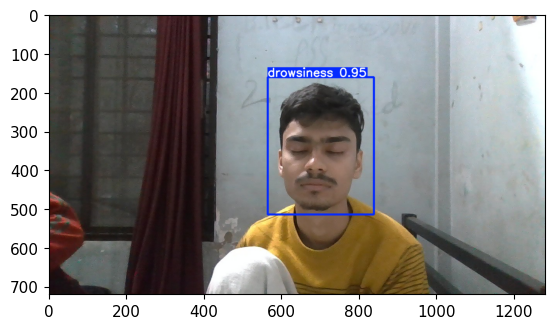

In [64]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [67]:
# Open video file
video_path = r"C:\Users\Yuvraj\OneDrive\Files\YOLO\WIN_20250120_17_39_41_Pro.mp4"
cap = cv2.VideoCapture(video_path)

# Check if the video file was opened successfully
if not cap.isOpened():
    print("Error: Could not open video file.")
    exit()

# Process video frames
while cap.isOpened():
    ret, frame = cap.read()  # Read the next frame

    if not ret:
        print("End of video file or error reading frame.")
        break

    # Perform YOLOv5 detections
    results = model(frame)

    # Render detections on the frame
    rendered_frame = np.squeeze(results.render())  # Render bounding boxes and labels
    cv2.imshow('YOLO', rendered_frame)  # Display the frame

    # Exit on 'q' key press
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# Release video capture and close windows
cap.release()
cv2.destroyAllWindows()


C:\Users\Yuvraj/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Yuvraj/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Yuvraj/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Yuvraj/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Yuvraj/.cache\torch\hub\ultralytics_yolov5_master\m

End of video file or error reading frame.


C:\Users\Yuvraj/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Yuvraj/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Yuvraj/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Yuvraj/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
